In [28]:
#### library and directories
import numpy as np ### array object
import boto3
s3 = boto3.resource('s3')
import pandas as pd
import os
from sklearn import linear_model
import gc
gc.collect()
code_dir = os.path.join('', '/home/ubuntu/python_code/')
data_dir = os.path.join('', '/home/ubuntu/data/')
data_dir = '/home/ubuntu/data/'

In [37]:
input_data = pd.read_csv(data_dir + 'python_indep.csv')
input_data.rename(columns={'Unnamed: 0':'dates'}, inplace=True)
#test = input_data.drop(['y_Consumables_121','y_Consumables_194', 'y_Consumables_325', 'y_Consumables_unk'], axis=1 )

In [30]:
n_rows = input_data['y_Consumables_121'].count()
train_data = input_data[['y_Consumables_121','y_Consumables_194', 'y_Consumables_325', 'y_Consumables_unk']].head(n_rows-30)
test_data = input_data[['dates','y_Consumables_121','y_Consumables_194', 'y_Consumables_325', 'y_Consumables_unk']].tail(30)
#print(n_rows)
n_rows1 = test_data['y_Consumables_121'].count()


In [31]:
#x =input_data[input_data['dates'] == "2018-03-01"]
test = input_data[['y_Consumables_121','y_Consumables_194', 'y_Consumables_325', 'y_Consumables_unk']]
X = train_data[['y_Consumables_194', 'y_Consumables_325', 'y_Consumables_unk']]
Y = train_data[['y_Consumables_121']]
X_test = test_data[['y_Consumables_194', 'y_Consumables_325', 'y_Consumables_unk']]
Y_test = test_data[['dates', 'y_Consumables_121']]


In [32]:
regr = linear_model.LinearRegression()
test = regr.fit(X, Y)
#test.score(X, Y)
coef = test.coef_
inter = test.intercept_ 
coef

array([[ 0.36319889,  2.42291207, -0.45569589]])

In [33]:
Y_test = Y_test.reset_index(drop=True)
combin = pd.concat([pd.DataFrame(test.predict(X_test), columns=['prediction']),Y_test], axis=1 )
combin.set_index('dates', inplace=True)
combin.plot(legend=True)

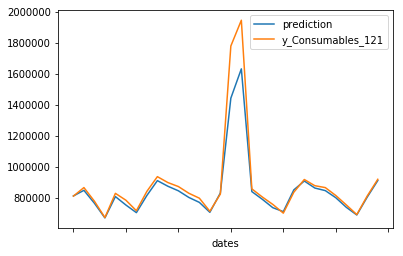